# NBaIoT SOMKNN CLASSIFY

## Device 7

- Training on device 7 (using both Mirai and Gafgyt).
- Testing on device 7 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/huunoi/Projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

2022-08-09 10:59:42.891685: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-09 10:59:42.895861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-09 10:59:42.895873: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/huunoi/Projects/research/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 7

In [8]:
train_index

7

# 1. Load data and preprocess data

In [9]:
# Load data on device 3
data_benign, target_benign, data_gafgyt, target_gafgyt = get_data_d3(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape)

(((52150, 115), (52150,)), ((323072, 115), (323072,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((36505, 115), (15645, 115), (36505,), (15645,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((226150, 115), (96922, 115), (226150,), (96922,))

## Set ratio

In [14]:
benign_size = data_benign_train.shape[0]
print(benign_size)

36505


In [15]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [16]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [17]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(36505, 115) (36505,)


In [18]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [19]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(73010, 115) (73010,)


## Get test data

### Gafgyt

In [20]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(112567, 115) (112567,)


In [21]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((15645, 115), (96922, 115), (15645,), (96922,))

# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [22]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='rand')

### Test on the same device

#### Test on gafgyt

In [23]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [24]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

## 2.1.2. TPE

### Train

In [25]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='tpe')

### Test on first device

#### Test on gafgyt

In [26]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [27]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)


## 2.1.3. ATPE

### Train

In [28]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(73010, 115) (73010,)
------------Scale data-----------------
(73010, 115) (73010,)
X_train_scaled
[[1.02289196e-02 3.76109592e-01 8.55484268e-03 ... 9.23854339e-04
  0.00000000e+00 0.00000000e+00]
 [4.97314154e-03 2.52696640e-01 1.36487416e-11 ... 5.45598830e-02
  6.97667131e-03 4.16533947e-02]
 [3.36049276e-03 1.71833715e-01 0.00000000e+00 ... 1.16301606e-02
  2.56364410e-12 3.10566335e-06]
 ...
 [3.36049276e-03 3.61356195e-01 1.84163083e-16 ... 9.80269033e-04
  0.00000000e+00 0.00000000e+00]
 [4.06830422e-03 7.58170005e-02 5.77351390e-03 ... 1.17575407e-02
  2.14344300e-04 2.48581370e-02]
 [4.49876325e-03 8.58431269e-02 8.55734719e-03 ... 1.17540030e-02
  8.14077147e-05 1.75302130e-02]]
---------Normalize data--------------
(73010, 115) (73010,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM-------------------------------------
Number of feature:  115
The 

### Test on the same device

#### Test on gafgyt

Shape:  (112567, 115) (112567,)
----------------------Test is starting----------------------
Scale data
Shape:  (112567, 115) (112567,)
Normalize data
Shape:  (112567, 115) (112567,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.984     0.997     0.990     15645
           2      1.000     0.997     0.998     96922

    accuracy                          0.997    112567
   macro avg      0.992     0.997     0.994    112567
weighted avg      0.997     0.997     0.997    112567



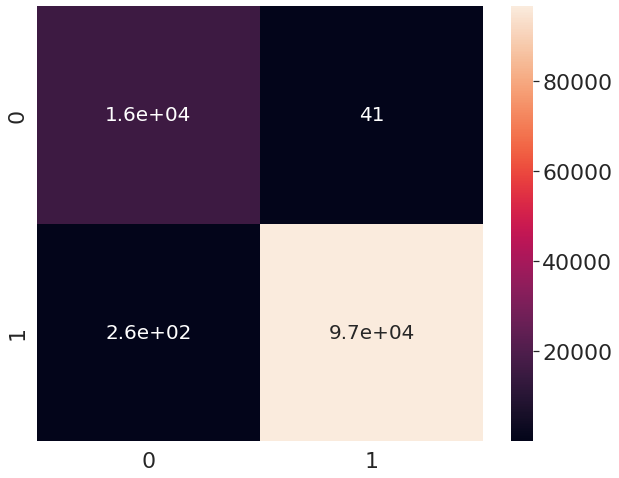

AUC score:  9.973432336812549e-01


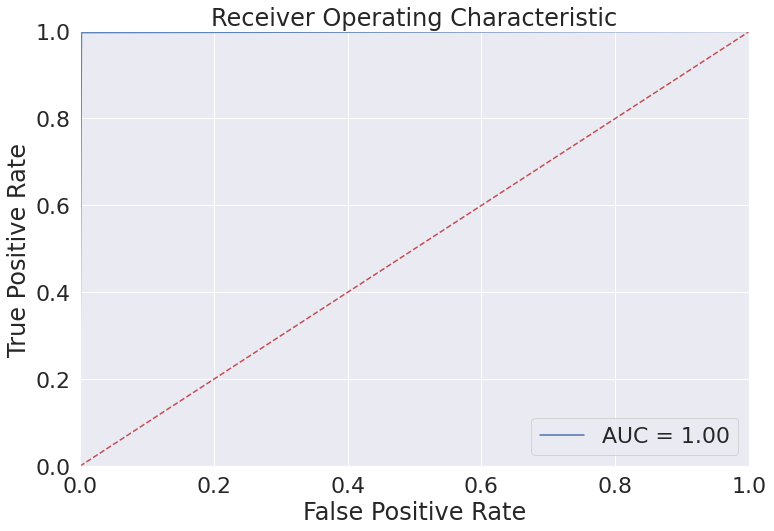

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [29]:
# doest not use Algo
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (112567, 115) (112567,)
----------------------Test is starting----------------------
Scale data
Shape:  (112567, 115) (112567,)
Normalize data
Shape:  (112567, 115) (112567,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.984     0.997     0.990     15645
           2      1.000     0.997     0.998     96922

    accuracy                          0.997    112567
   macro avg      0.992     0.997     0.994    112567
weighted avg      0.997     0.997     0.997    112567



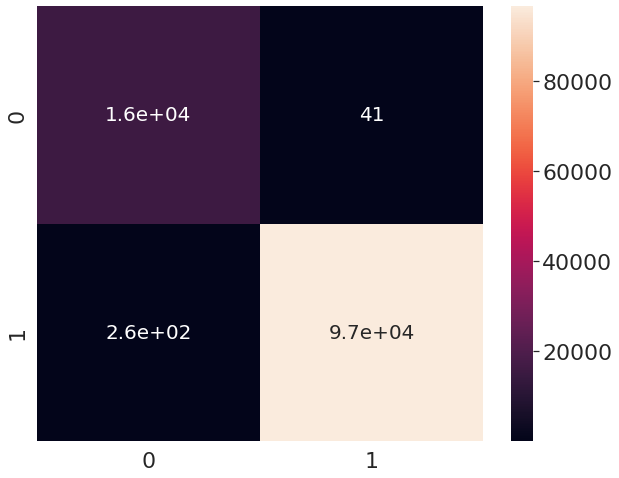

AUC score:  0.9973432336812549


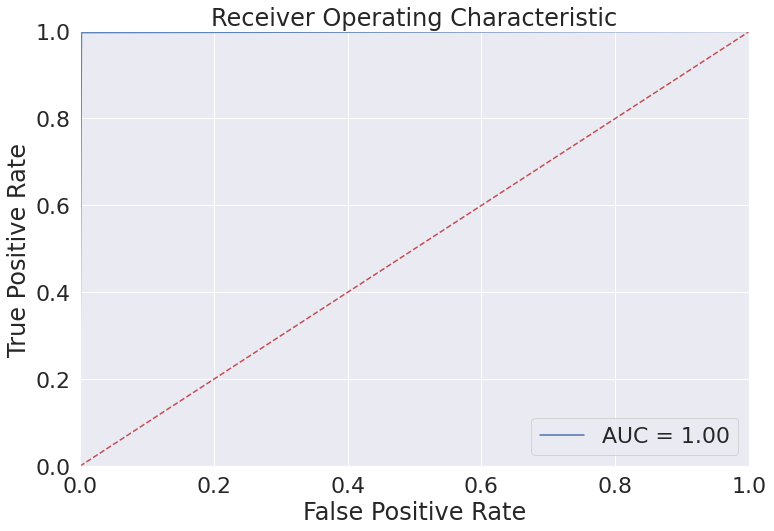

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [30]:
# using KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'KNN')

Shape:  (112567, 115) (112567,)
----------------------Test is starting----------------------
Scale data
Shape:  (112567, 115) (112567,)
Normalize data
Shape:  (112567, 115) (112567,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.984     0.997     0.990     15645
           2      1.000     0.997     0.998     96922

    accuracy                          0.997    112567
   macro avg      0.992     0.997     0.994    112567
weighted avg      0.997     0.997     0.997    112567



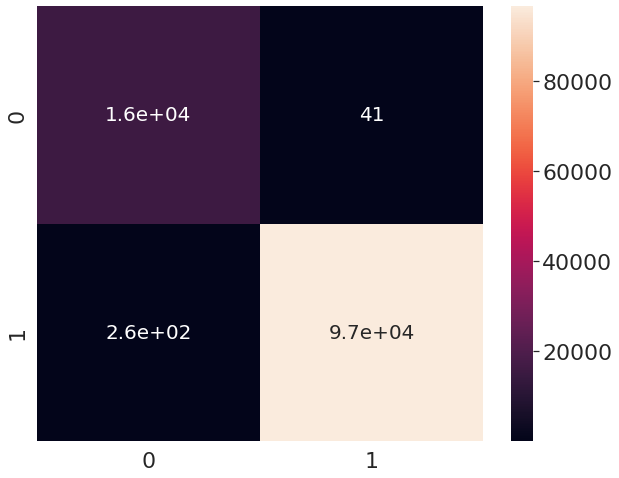

AUC score:  0.9973432336812549


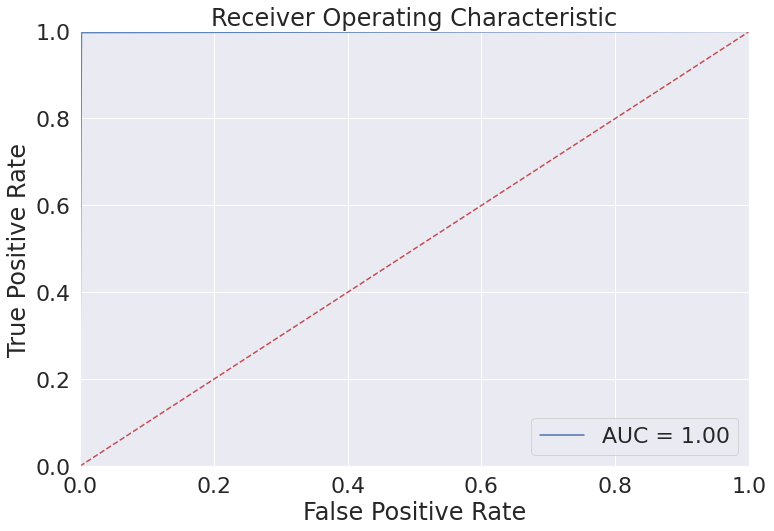

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [31]:
# using SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SVM')

Shape:  (112567, 115) (112567,)
----------------------Test is starting----------------------
Scale data
Shape:  (112567, 115) (112567,)
Normalize data
Shape:  (112567, 115) (112567,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.984     0.997     0.990     15645
           2      1.000     0.997     0.998     96922

    accuracy                          0.997    112567
   macro avg      0.992     0.997     0.994    112567
weighted avg      0.997     0.997     0.997    112567



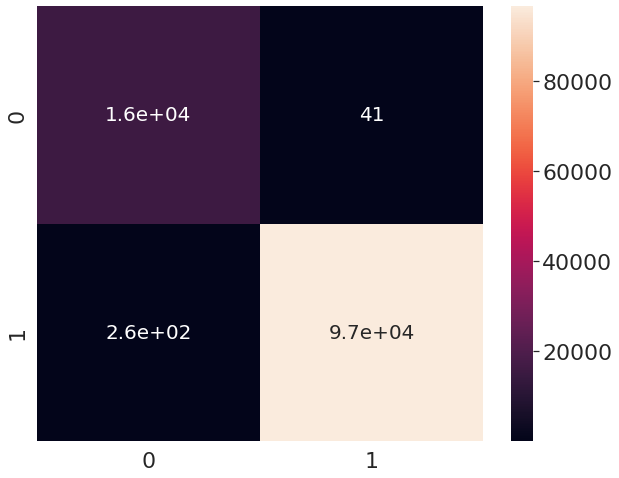

AUC score:  0.9973432336812549


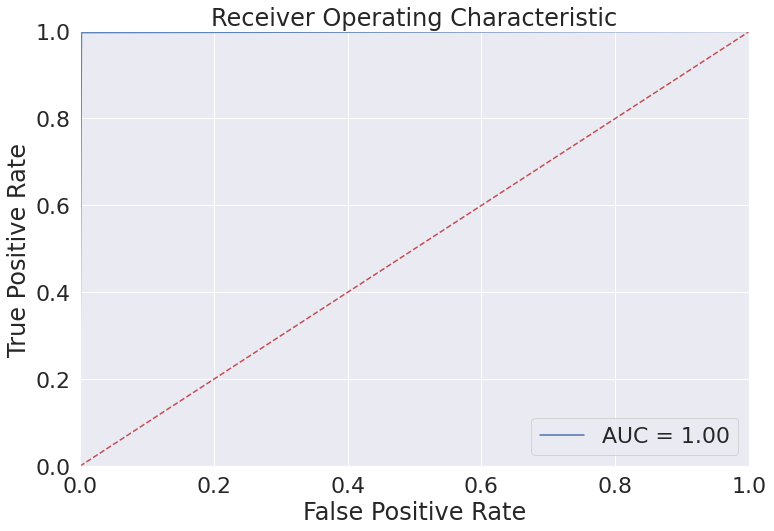

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [32]:
# using SOFTMAX
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SOFTMAX')

Shape:  (112567, 115) (112567,)
----------------------Test is starting----------------------
Scale data
Shape:  (112567, 115) (112567,)
Normalize data
Shape:  (112567, 115) (112567,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.984     0.997     0.990     15645
           2      1.000     0.997     0.998     96922

    accuracy                          0.997    112567
   macro avg      0.992     0.997     0.994    112567
weighted avg      0.997     0.997     0.997    112567



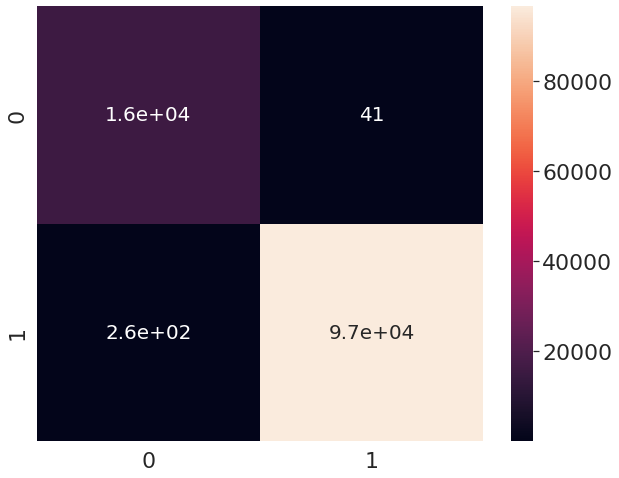

AUC score:  0.9973432336812549


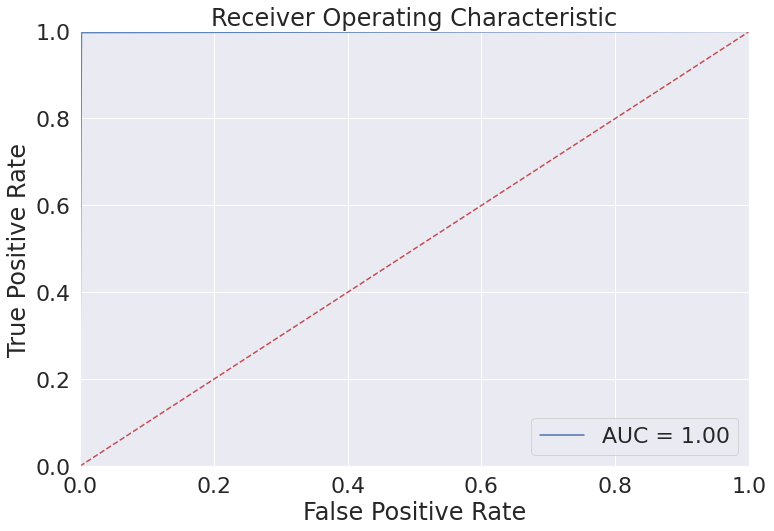

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [33]:
# using Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'RF')


## 2.1.4. Anneal

### Train

In [34]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [35]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [36]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)